In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from skimage.io import imread
import numpy as np
import cv2
import os
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
os.chdir("/content/drive/MyDrive/IS4242 Group 1")
os.getcwd()

Mounted at /content/drive


'/content/drive/.shortcut-targets-by-id/1QXRD8jLfj0PrtuIY29D8kquWN6CZD1Fm/IS4242 Group 1'

In [3]:
fruit_types = ['Tomato', 'Orange', 'Banana', 'Apple', 'Pear', 'Lemon', 'Capsicum']
img_types = ['jpg', 'png', 'heic', 'jpeg', 'JPG', 'PNG']

***Normal***

In [4]:
# Set up the train data
img_dir = 'codes/data/seven_classes/train/'

X_train, y_train = [], []

# Load the image data and labels
for class_idx, class_name in enumerate(fruit_types):
    for img_type in img_types:
        for file_name in os.listdir(os.path.join(img_dir, class_name)):
            if file_name.endswith(img_type):
                image = Image.open(os.path.join(img_dir, class_name, file_name))
                image = image.resize((256, 256))
                image = image.convert('RGB')
                image = np.array(image)
                X_train.append(image.flatten())
                y_train.append(class_idx)

***Augmented Images***

In [5]:
# Set up the train data
img_dir = 'codes/data/seven_classes/augmented/'

X_train_aug, y_train_aug = [], []

# Load the image data and labels
for class_idx, class_name in enumerate(fruit_types):
    for img_type in img_types:
        for file_name in os.listdir(os.path.join(img_dir, class_name)):
            if file_name.endswith(img_type):
                image = Image.open(os.path.join(img_dir, class_name, file_name))
                image = image.resize((256, 256))
                image = image.convert('RGB')
                image = np.array(image)
                X_train_aug.append(image.flatten())
                y_train_aug.append(class_idx)

***Test Images***

In [6]:
# Set up the test data
img_dir = 'codes/data/seven_classes/val/'

X_test, y_test = [], []

# Load the image data and labels
for class_idx, class_name in enumerate(fruit_types):
    for img_type in img_types:
        for file_name in os.listdir(os.path.join(img_dir, class_name)):
            if file_name.endswith(img_type):
                image = Image.open(os.path.join(img_dir, class_name, file_name))
                image = image.resize((256, 256))
                image = image.convert('RGB')
                image = np.array(image)
                X_test.append(image.flatten())
                y_test.append(class_idx)

In [7]:
# Convert the data to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f'Total train data length: {len(X_train)}')
print(f'Total augmented train data length: {len(X_train_aug)}')
print(f'\nTotal test data length: {len(X_test)}')

Total train data length: 105
Total augmented train data length: 700

Total test data length: 35


***Model Training***

In [8]:
# Train the random forest classifier for normal images
model = RandomForestClassifier(n_estimators=100, random_state=50)
model.fit(X_train, y_train)

# Train the random forest classifier for augmented images
model_aug = RandomForestClassifier(n_estimators=100, random_state=42)
model_aug.fit(X_train_aug, y_train_aug)

# Predict the class labels for the test data
y_pred = model.predict(X_test)
y_pred_aug = model_aug.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'\nThe accuracy of the RF classifier for 100 estimators and normal images of 7 classes is {accuracy:.4f}')
accuracy_aug = accuracy_score(y_test, y_pred_aug)
print(f'\nThe accuracy of the RF classifier for 100 estimators and augmented images of 7 classes is {accuracy_aug:.4f}')


The accuracy of the RF classifier for 100 estimators and normal images of 7 classes is 0.8571

The accuracy of the RF classifier for 100 estimators and augmented images of 7 classes is 0.8286


In [9]:
# Train the random forest classifier for normal images
model300 = RandomForestClassifier(n_estimators=300, random_state=42)
model300.fit(X_train, y_train)

# Train the random forest classifier for augmented images
model_aug300 = RandomForestClassifier(n_estimators=300, random_state=42)
model_aug300.fit(X_train_aug, y_train_aug)

# Predict the class labels for the test data
y_pred300 = model300.predict(X_test)
y_pred_aug300 = model_aug300.predict(X_test)

# Calculate the accuracy of the classifier
accuracy300 = accuracy_score(y_test, y_pred300)
print(f'\nThe accuracy of the RF classifier for 300 estimators and normal images of 7 classes is {accuracy300:.4f}')
accuracy_aug300 = accuracy_score(y_test, y_pred_aug300)
print(f'\nThe accuracy of the RF classifier for 300 estimators and augmented images of 7 classes is {accuracy_aug300:.4f}')


The accuracy of the RF classifier for 300 estimators and normal images of 7 classes is 0.8286

The accuracy of the RF classifier for 300 estimators and augmented images of 7 classes is 0.8857


In [10]:
print(classification_report(y_test, y_pred, target_names=fruit_types))

              precision    recall  f1-score   support

      Tomato       1.00      1.00      1.00         5
      Orange       1.00      1.00      1.00         5
      Banana       1.00      0.60      0.75         5
       Apple       0.56      1.00      0.71         5
        Pear       1.00      0.80      0.89         5
       Lemon       0.83      1.00      0.91         5
    Capsicum       1.00      0.60      0.75         5

    accuracy                           0.86        35
   macro avg       0.91      0.86      0.86        35
weighted avg       0.91      0.86      0.86        35



In [11]:
print(classification_report(y_test, y_pred_aug300, target_names=fruit_types))

              precision    recall  f1-score   support

      Tomato       0.83      1.00      0.91         5
      Orange       1.00      1.00      1.00         5
      Banana       1.00      0.60      0.75         5
       Apple       0.83      1.00      0.91         5
        Pear       0.80      0.80      0.80         5
       Lemon       0.83      1.00      0.91         5
    Capsicum       1.00      0.80      0.89         5

    accuracy                           0.89        35
   macro avg       0.90      0.89      0.88        35
weighted avg       0.90      0.89      0.88        35



In [ ]:
print(classification_report(y_test, y_pred_aug, target_names=fruit_types))

              precision    recall  f1-score   support

      Tomato       0.83      1.00      0.91         5
      Orange       1.00      1.00      1.00         5
      Banana       1.00      0.40      0.57         5
       Apple       0.67      0.80      0.73         5
        Pear       0.80      0.80      0.80         5
       Lemon       0.83      1.00      0.91         5
    Capsicum       0.80      0.80      0.80         5

    accuracy                           0.83        35
   macro avg       0.85      0.83      0.82        35
weighted avg       0.85      0.83      0.82        35



In [ ]:
print(confusion_matrix(y_pred, y_test))

[[5 0 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 2 5 1 0 0]
 [0 0 1 0 4 0 0]
 [0 0 0 0 0 5 1]
 [0 0 0 0 0 0 4]]


In [ ]:
print(confusion_matrix(y_pred_aug, y_test))

[[5 0 0 0 1 0 0]
 [0 5 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 2 4 0 0 0]
 [0 0 1 0 4 0 0]
 [0 0 0 0 0 5 1]
 [0 0 0 1 0 0 4]]


In [ ]:
path='Augmented Images/Test/'
for file_name in os.listdir(path):
  img = Image.open(path+file_name)
  img = img.resize((256, 256))
  img = img.convert('RGB')
  img = np.array(img)
  plt.imshow(img)
  plt.show()
  img_flat = img.flatten().reshape(1, -1)
  probability=model.predict_proba(img_flat)
  for ind,class_name in enumerate(fruit_types):
      print(f'{class_name} = {probability[0][ind]}%')
  print("The predicted image is : "+fruit_types[model.predict(img_flat)[0]])

Output hidden; open in https://colab.research.google.com to view.

*Accuracy for model_ten: 35/47 = 0.7447* 

In [ ]:
path='Augmented Images/Test/'
for file_name in os.listdir(path):
  img = Image.open(path+file_name)
  img = img.resize((256, 256))
  img = img.convert('RGB')
  img = np.array(img)
  plt.imshow(img)
  plt.show()
  img_flat = img.flatten().reshape(1, -1)
  probability=model_aug.predict_proba(img_flat)
  for ind,class_name in enumerate(fruit_types):
      print(f'{class_name} = {probability[0][ind]}%')
  print("The predicted image is : "+fruit_types[model_aug.predict(img_flat)[0]])

Output hidden; open in https://colab.research.google.com to view.

*Accuracy for model_seven: 37/47 = 0.7872* 

In [ ]:
def test_new_img(file_name, model):
  path='Images/'
  img = Image.open(path+file_name)
  img = img.resize((256, 256))
  img = img.convert('RGB')
  img = np.array(img)
  plt.imshow(img)
  plt.show()
  img_flat = img.flatten().reshape(1, -1)
  probability=model.predict_proba(img_flat)
  for ind,class_name in enumerate(fruit_types):
      print(f'{class_name} = {probability[0][ind]}%')
  print("The predicted image is : "+fruit_types[model.predict(img_flat)[0]])

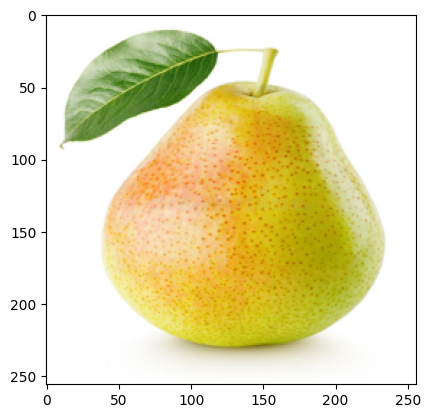

Tomato = 0.16%
Orange = 0.0%
Banana = 0.2%
Apple_Red = 0.01%
Apple_Green = 0.04%
Pear = 0.53%
Lemon = 0.0%
Capsicum_Red = 0.0%
Capsicum_Green = 0.04%
Capsicum_Yellow = 0.02%
The predicted image is : Pear


In [ ]:
test_new_img('random_forest_train/test/pear_test.jpg', model)